In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("color therapy.csv")
data.head()

,color,Hex,Decimal,efficacy
0,paper,NaN,NaN,피부관리의 컬러테라피 적용에 관한 기초적 연구
1,idx,NaN,NaN,음양 오행
2,빨간색(적),#FF0000,NaN,"붉은 것은 불의 색깔이며, 붉은 빛은 심에 관계된 빛이다. 심장의활동이 왕성하면 얼..."
3,흰색(백),#FFFFFF,NaN,흰색은 폐에 관계된 색으로 근심이 많은 사람은 안색이 희다. 그 리고 선천적으로 폐...
4,파란색(청),#0505FF,NaN,청색은 정맥성 충혈에 의해서 조직이 청색으로 변하는 것이다. 이 정맥성 충혈은 심장...


`color` 데이터 프레임에서  
`paper`는 논문의 레퍼런스를 나타냄  
`idx`는 각 논문에서의 소제목을 나타냄  
`Hex`열은 현재 색상의 rgb hex code를 나타냄  
`Decimal`열은 현재 색상의 10진수 rgb code를 나타냄  

In [3]:
data[['color', 'efficacy']].head()

,color,efficacy
0,paper,피부관리의 컬러테라피 적용에 관한 기초적 연구
1,idx,음양 오행
2,빨간색(적),"붉은 것은 불의 색깔이며, 붉은 빛은 심에 관계된 빛이다. 심장의활동이 왕성하면 얼..."
3,흰색(백),흰색은 폐에 관계된 색으로 근심이 많은 사람은 안색이 희다. 그 리고 선천적으로 폐...
4,파란색(청),청색은 정맥성 충혈에 의해서 조직이 청색으로 변하는 것이다. 이 정맥성 충혈은 심장...


In [4]:
index = np.array(data.index)
del_index = []

for idx in index:
    if data['color'][idx] == "paper" or data['color'][idx] == "idx":
        del_index.append(idx)

cleaned_data = data.drop(del_index)
cleaned_data.head(10)

,color,Hex,Decimal,efficacy
2,빨간색(적),#FF0000,NaN,"붉은 것은 불의 색깔이며, 붉은 빛은 심에 관계된 빛이다. 심장의활동이 왕성하면 얼..."
3,흰색(백),#FFFFFF,NaN,흰색은 폐에 관계된 색으로 근심이 많은 사람은 안색이 희다. 그 리고 선천적으로 폐...
4,파란색(청),#0505FF,NaN,청색은 정맥성 충혈에 의해서 조직이 청색으로 변하는 것이다. 이 정맥성 충혈은 심장...
5,노란색(황),#FFFF02,NaN,노랑은 흙색이며 비위는 흙과 같다. 비는 피를 만들고 위는 양분 을 섭취하여 우리 ...
6,흑색(흑),#282828,NaN,"검은색은 물의 색이고 그늘과 추위의 색이다. 크게 공포를 느껴도 검어지며, 평상시에..."
8,보라,#8B00FF,check,"예술적인 영감이나 영적인 것의 중심으로 삶과 타인에 대한 애정이나 동정을 개발하고,..."
9,남색,#000080,check,"내면의 눈, 자존심, 예지에 관계하며, 기운이 막힐 경우 삶의 목표상실, 불안감 등..."
10,파랑,#0000FF,check,"자기표현과 의사소통의 영역, 기운이 쇠할 경 우 행동이 억제되거나 반대로 과도해진다..."
11,초록,#008000,check,"사랑과 애정의 중심으로, 인간관계나 감정을 조절하며 기운이 쇠할 경우 감정조절이 어..."
12,노랑,#FFD400,check,"지성, 논리적인 학업에 관계하며, 기운이 쇠할 경우 정신적 문제를 유발한다.이것에 ..."


# Point1
현재 색상은 같은 색이라도 다른 단어를 사용하고 있음 이러한 단어들을 묶은 후   
색상에 대한 효능에 대해서 일관성을 가지는지 확인  
챠크라 이론에서 무지개색으로 분류하므로 7개의 동의어 배열을 만듬  
1. 직관적으로 각 색깔에 대한 효능을 비교
2. tf-idf 비교(나중에)
3. 각 문장 별 가장 많이 나온 단어들에 대해서 heatmap

In [5]:
# 현재 데이터 나타난 색상을 묶음
reds = ["빨간색(적)", '빨강', '레드']
blue = ["파란색(청)",'남색','파랑', '블루']
white = ["흰색(백)", '하양']
yellow = ["노란색(황)", '주황']
black = ["흑색(흑)", '회색', '검정', '인디고']
purple = ['보라', '바이올렛']
green = ['초록', '녹색', '청록', '그린']
pink = ['마젠다']
brown = ['갈색']

color_set = [reds , blue, white, yellow, black, purple, green, pink, brown]

In [32]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
import platform
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from gensim.models import Word2Vec

if platform.system() == 'Windows':
    font = 'Malgun Gothic'
else:
    font = 'NanumGothic'

okt = Okt()
stop_words = "동의보감 기록 오다 나다 모든 또한 이용 수 하다 모두 다른 은 것 또 내 및 등 그 번 때 위해 나 이 아주 이외 소 몹시 로부터 비롯 화 장 거나 거리 각종 배 창 예 말 방 리 퀴리 틴"
stop_words = set(stop_words.split(' '))
wiki_model = Word2Vec.load('./ko/ko.bin')


def get_color_efficacy(colors):
    result = []
    for idx in cleaned_data.index:
        if data['color'][idx] in colors:
            result.append(data['efficacy'][idx])
    return result

def get_color_efficacy_add(colors):
    result = ""
    for idx in cleaned_data.index:
        if data['color'][idx] in colors:
            result = result + data['efficacy'][idx]
    return result

def getMorps(sent):
    return Okt().pos(sent , norm=False , stem = True) 

def getNV(morps):
    result = []
    for item , morp in morps:
        if morp == 'Verb' or morp == 'Noun': 
            result.append(item)
    s_result = []
    
    for word in result:
        if word not in stop_words:
            s_result.append(word)
    return s_result

def getN(morps):
    result = []
    for item , morp in morps:
        if morp == 'Noun': 
            result.append(item)
    s_result = []
    
    for word in result:
        if word not in stop_words:
            s_result.append(word)
    s_result = np.unique(s_result)
    return s_result

def get_tfidf(colors):
    text = get_color_efficacy(colors)
    vect = TfidfVectorizer()
    text_martrix = vect.fit_transform(text)
    tf = pd.DataFrame(text_martrix.toarray(), columns=vect.get_feature_names())

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log(D+1) / (df+1) + 1

    tfidf = tf * idf
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    return tfidf

def counter(sents, n):
    #print(sorted(collections.Counter(sents)))
    return sorted(collections.Counter(sents),reverse=True)[0:n]

def get_heatmap(words,color_name,figsize):
    plt.rc('font', family=font)
    result = []
    for out_word in words:
        sub_result = []
        for in_word in words:
            try:
                sub_result.append(wiki_model.wv.similarity(out_word, in_word))
            except:
                sub_result.append(0)
        result.append(sub_result)
    
    fig = plt.figure(figsize=figsize)
    fig.set_facecolor('white')
    plt.title(f'{color_name}에서 단어들간의 유사도 확인')
    sns.heatmap(result,annot=True)
    plt.xticks(np.arange(len(words)),words)
    plt.yticks(np.arange(len(words)),words)
    plt.show()

def overlap(sents,n):
    result = 0
    for x, y in collections.Counter(sents).items():
        if y > n:
            result = result + 1
    return result/(len(collections.Counter(sents).items()))

def overlap_veiw(color_name,sents,n):
    rets = []
    for i in np.arange(1,n):
        rets.append(overlap(sents,i))
    fig = plt.figure()
    plt.bar(np.arange(1,n),rets)
    plt.title(f'{color_name}의 중복되는 단어의 비율')
    plt.show()
    

In [33]:
# txt로 확인
get_color_efficacy(reds)
get_color_efficacy(blue)
get_color_efficacy(white)
get_color_efficacy(yellow)
get_color_efficacy(black)
get_color_efficacy(purple)
get_color_efficacy(green)
get_color_efficacy(pink)
get_color_efficacy(brown)

['갈색은 심리학에서 의무의 이행에 성실한, 인색함, 자린고비 같은, 습관, 완고한, 신뢰성 등을 나타낸다. 갈색은 빨강, 노랑, 파랑 등의 여러 색의 혼 합으로 만들어지는 중성색이다. 흙이나 낙엽, 나무, 돌 등에서 볼 수 있는 갈색은 자연적이며, 친화적인 느낌을 준다. 오래두고 봐도 편안하게 볼 수 있는 장점을 가지고 있다. 심리적으로 감정에 대한 억압이나 두려움을 완 화시켜주고, 자연과 밀접한 색상이므로 정서적으로 격동의 시기를 겪거나 스트레스를 받을 때에 도움을 준다.']

In [38]:
cleaned_data['efficacy Morps'] = cleaned_data['efficacy'].map(lambda x : getMorps(x))
cleaned_data['efficacy NV'] = cleaned_data['efficacy Morps'].map(lambda x : getNV(x))
cleaned_data['efficacy count'] = cleaned_data['efficacy NV'].map(lambda x : counter(x,10))
cleaned_data.head(10)

,color,Hex,Decimal,efficacy,efficacy Morps,efficacy NV,efficacy count
2,빨간색(적),#FF0000,NaN,"붉은 것은 불의 색깔이며, 붉은 빛은 심에 관계된 빛이다. 심장의활동이 왕성하면 얼...","[(붉다, Adjective), (것, Noun), (은, Josa), (불의, N...","[불의, 색깔, 빛, 심, 관계, 되다, 빛, 심장, 활동, 왕성, 얼굴, 기쁨, ...","[활동, 증세, 작용, 왕성, 얼굴, 심장, 심, 신열, 술, 색깔]"
3,흰색(백),#FFFFFF,NaN,흰색은 폐에 관계된 색으로 근심이 많은 사람은 안색이 희다. 그 리고 선천적으로 폐...,"[(흰색, Noun), (은, Josa), (폐, Noun), (에, Josa), ...","[흰색, 폐, 관계, 되다, 색, 근심, 사람, 안색, 선천, 폐가, 사람, 대개,...","[흰색, 홍조, 폐병, 폐가, 폐, 징조, 진행, 여기, 얼굴, 안색]"
4,파란색(청),#0505FF,NaN,청색은 정맥성 충혈에 의해서 조직이 청색으로 변하는 것이다. 이 정맥성 충혈은 심장...,"[(청색, Noun), (은, Josa), (정맥, Noun), (성, Suffix...","[청색, 정맥, 충혈, 조직, 청색, 정맥, 충혈, 심장, 활동, 보이다, 현상, ...","[활동, 현상, 푸른색, 투쟁, 충혈, 청색, 조직, 정맥, 억제, 심장]"
5,노란색(황),#FFFF02,NaN,노랑은 흙색이며 비위는 흙과 같다. 비는 피를 만들고 위는 양분 을 섭취하여 우리 ...,"[(노랑, Noun), (은, Josa), (흙색, Noun), (이며, Josa)...","[노랑, 흙색, 비위, 흙, 비다, 피, 만들다, 위, 양분, 섭취, 우리, 몸, ...","[흙색, 흙, 황색, 화기, 피, 위, 우리, 얼굴, 양분, 섭취]"
6,흑색(흑),#282828,NaN,"검은색은 물의 색이고 그늘과 추위의 색이다. 크게 공포를 느껴도 검어지며, 평상시에...","[(검은색, Noun), (은, Josa), (물의, Noun), (색, Noun)...","[검은색, 물의, 색, 그늘, 추위, 색, 크게, 공포, 느끼다, 검어지다, 평상시...","[평상시, 크게, 추위, 질린다, 정력, 용기, 왕성, 얼굴, 성적, 색]"
8,보라,#8B00FF,check,"예술적인 영감이나 영적인 것의 중심으로 삶과 타인에 대한 애정이나 동정을 개발하고,...","[(예술, Noun), (적, Suffix), (인, Josa), (영감, Noun...","[예술, 영감, 영적, 중심, 삶, 타인, 대한, 애정, 동정, 개발, 기운, 쇠,...","[호르몬, 피부질환, 표면, 통, 타인, 질환, 중심, 중뇌, 줄, 좌골신경]"
9,남색,#000080,check,"내면의 눈, 자존심, 예지에 관계하며, 기운이 막힐 경우 삶의 목표상실, 불안감 등...","[(내면, Noun), (의, Josa), (눈, Noun), (,, Punctua...","[내면, 눈, 자존심, 예지, 관계, 기운, 막히다, 경우, 삶, 목표, 상실, 불...","[활동, 호흡기, 호르몬, 항진, 하부, 페렴, 통제, 코, 측면, 충수염]"
10,파랑,#0000FF,check,"자기표현과 의사소통의 영역, 기운이 쇠할 경 우 행동이 억제되거나 반대로 과도해진다...","[(자기, Noun), (표현, Noun), (과, Josa), (의사소통, Nou...","[자기, 표현, 의사소통, 영역, 기운, 쇠, 경, 행동, 억제, 되다, 반대, 과...","[히스테리, 화상, 호르몬, 행동, 항진, 피부질환, 표현, 편도선, 통풍, 치주염]"
11,초록,#008000,check,"사랑과 애정의 중심으로, 인간관계나 감정을 조절하며 기운이 쇠할 경우 감정조절이 어...","[(사랑, Noun), (과, Josa), (애정, Noun), (의, Josa),...","[사랑, 애정, 중심, 인간관계, 감정, 조절, 기운, 쇠, 경우, 감정, 조절, ...","[흉선, 후두, 호흡계, 형성, 폐, 팔, 탈진, 타다, 측면, 척추]"
12,노랑,#FFD400,check,"지성, 논리적인 학업에 관계하며, 기운이 쇠할 경우 정신적 문제를 유발한다.이것에 ...","[(지성, Noun), (,, Punctuation), (논리, Noun), (적,...","[지성, 논리, 학업, 관계, 기운, 쇠, 경우, 정신, 문제, 유발, 영향, 받다...","[흥분, 환각, 헛소리, 항진, 학업, 팽, 췌장, 책임지다, 질환, 질병]"


In [10]:
tmp = get_tfidf(reds)
tmp

,2위로,3도,4위,가라앉히고,가장,가중된,감기를,감정,감정을,감정이,...,활력과,활력을,활발해진다,활성시킨다,활성화,효과가,효과로,흔히,흥분,힘과
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169031,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135309,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135309,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.160788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160788,0.000000,0.160788
3,0.000000,0.000000,0.000000,0.102534,0.070259,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.102534,0.000000,0.000000,0.102534,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.106587,0.000000,0.106587,0.000000,0.073035,0.000000,0.000000,0.000000,0.106587,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.128648,0.000000,0.000000,0.000000,0.128648,0.128648,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.128648,0.128648,0.000000,0.128648,0.128648,0.000000,0.000000,0.000000


In [125]:
color_df = pd.DataFrame(columns=['color','efficacy'], index=range(0,len(color_set)))

i = 0
for colors in color_set:
    color_df['color'][i] = colors[0]
    text = ""
    
    for idx in cleaned_data.index:
        if cleaned_data['color'][idx] in colors:
            text = text + cleaned_data['efficacy'][idx]
    color_df['efficacy'][i] = text
    i = i+ 1



In [127]:
len(color_set)

9

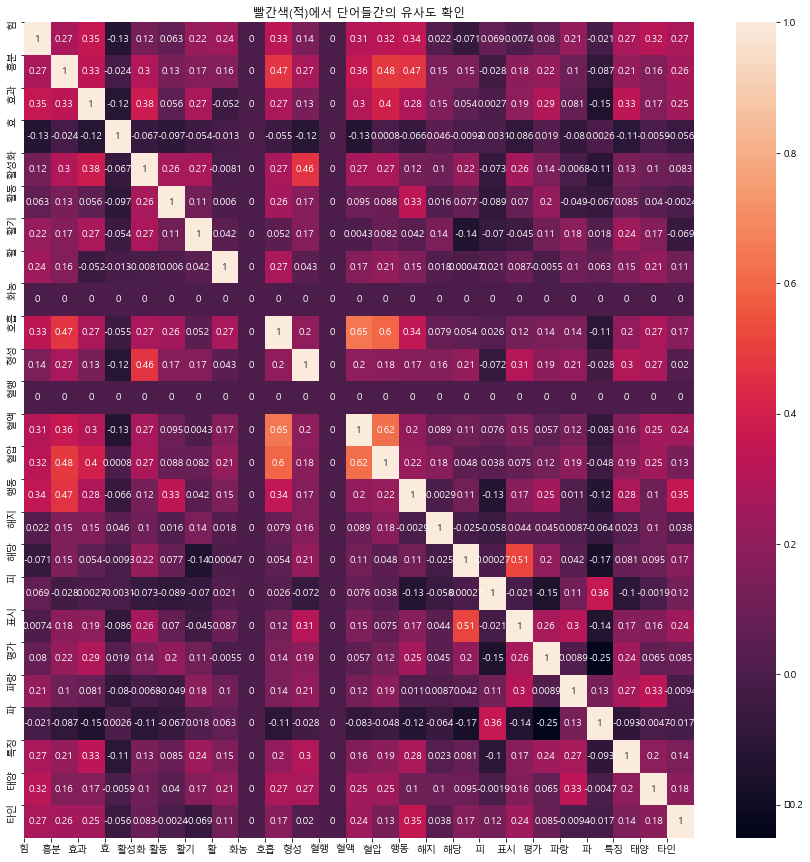

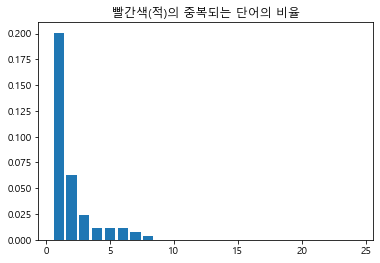

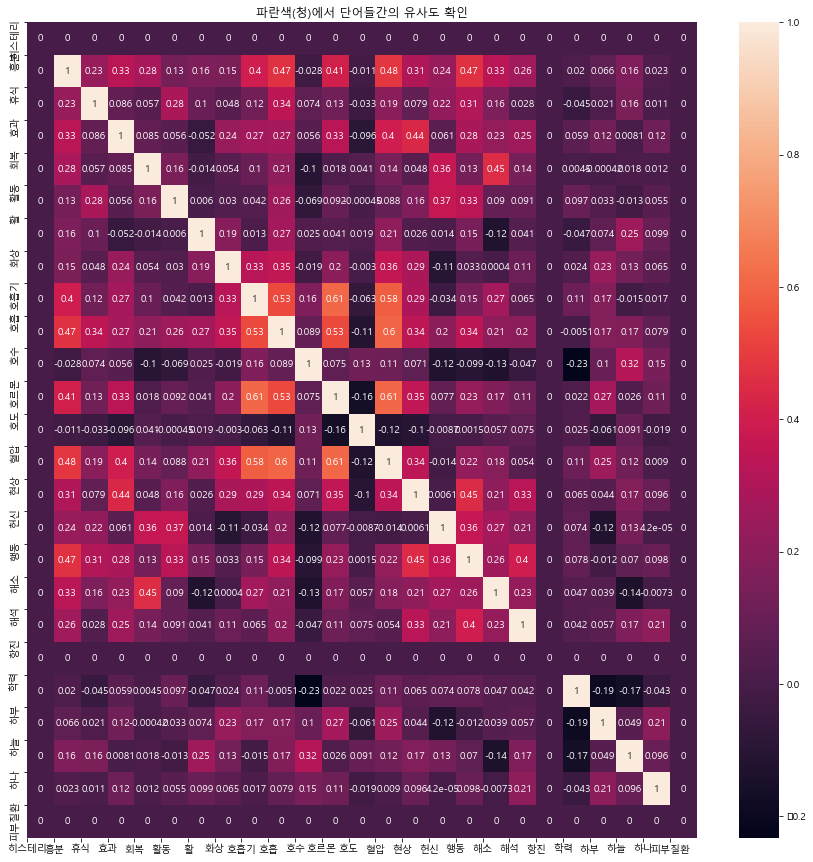

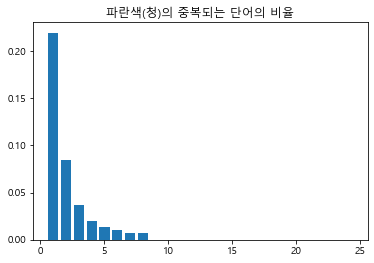

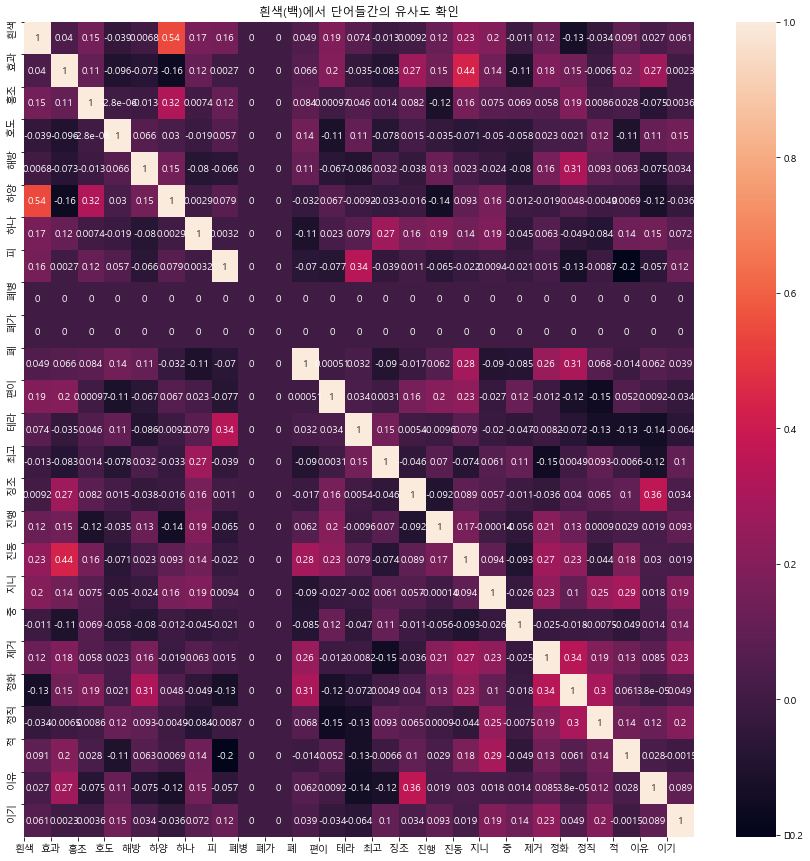

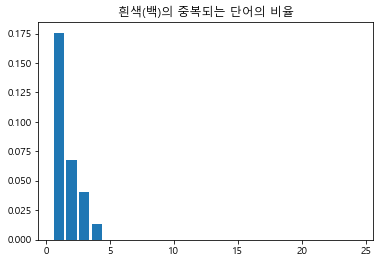

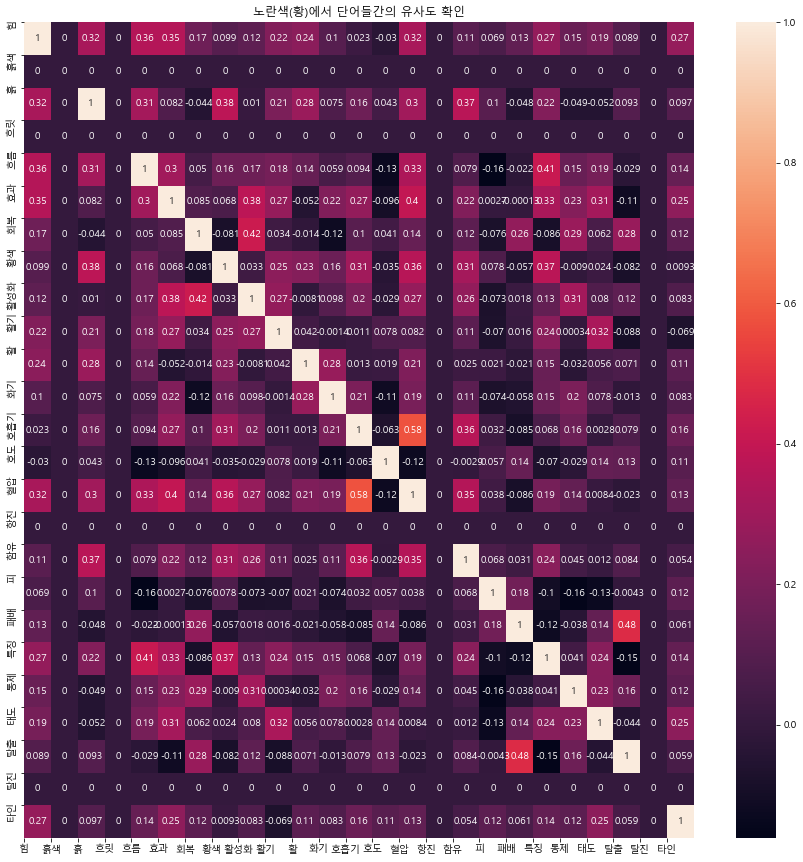

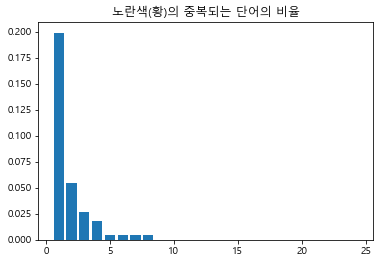

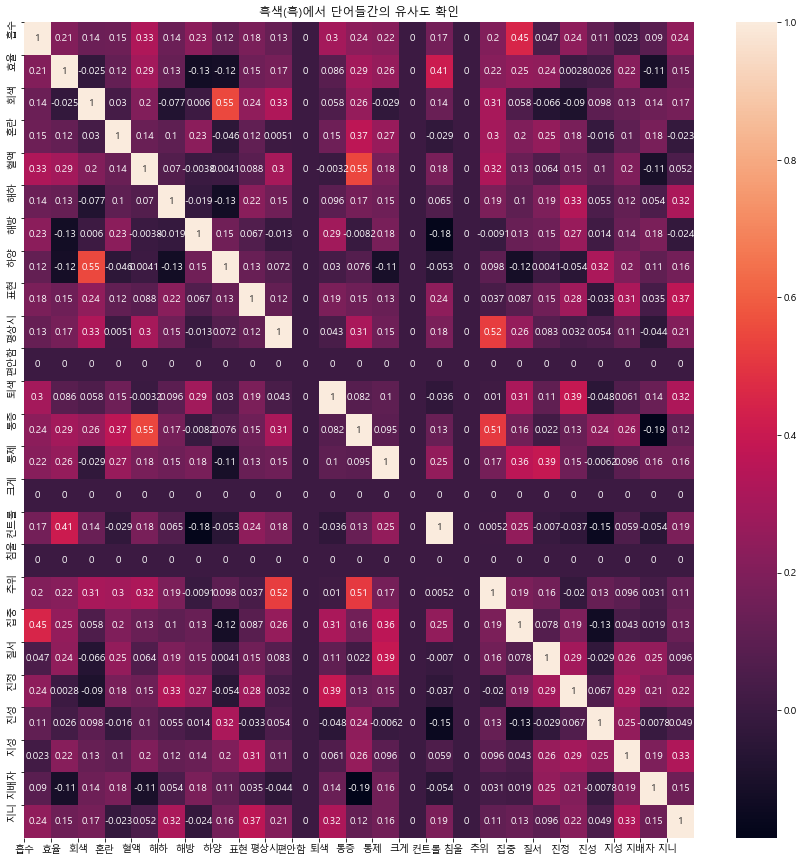

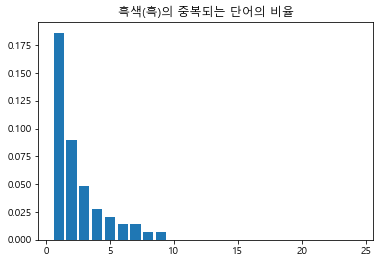

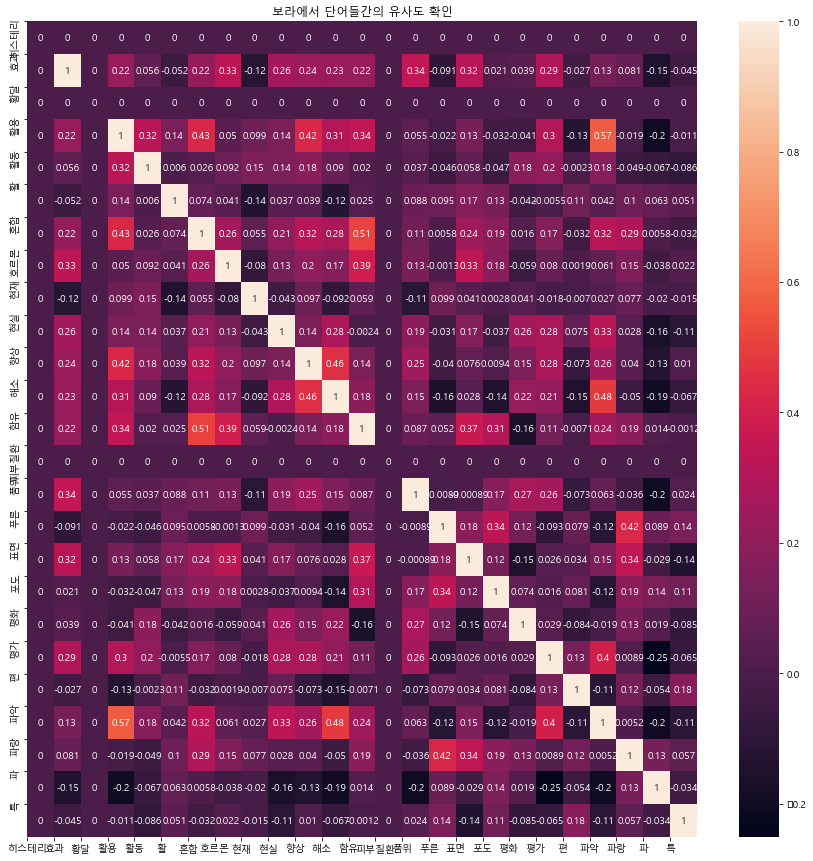

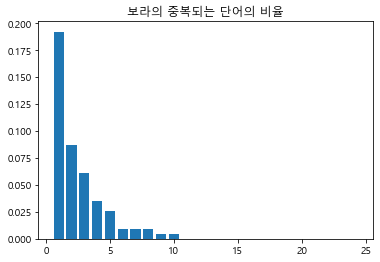

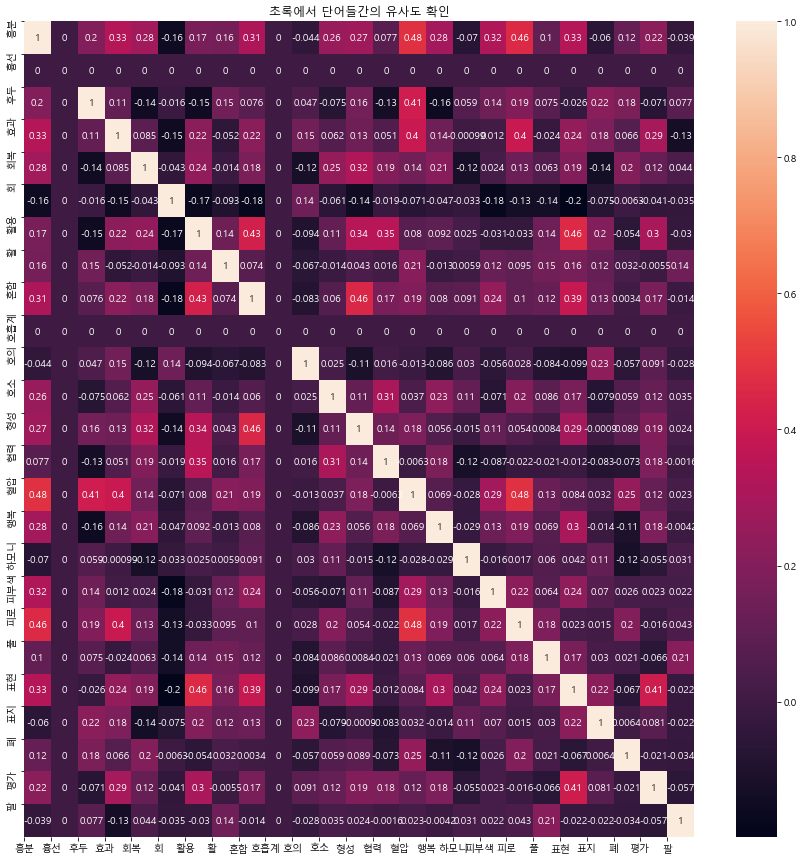

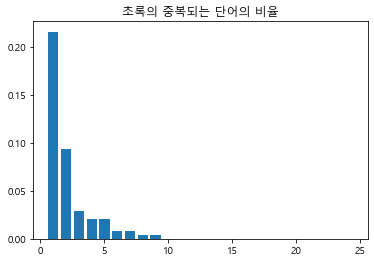

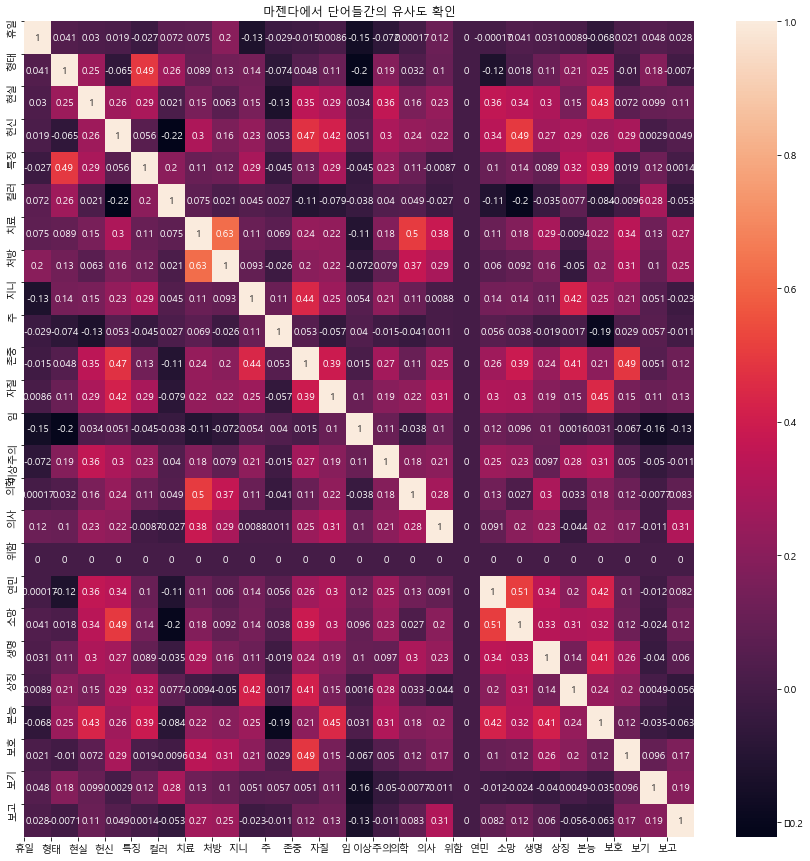

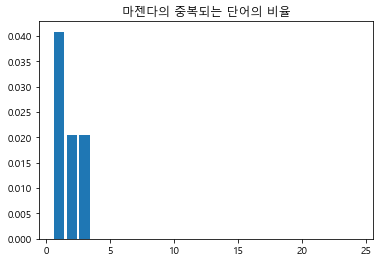

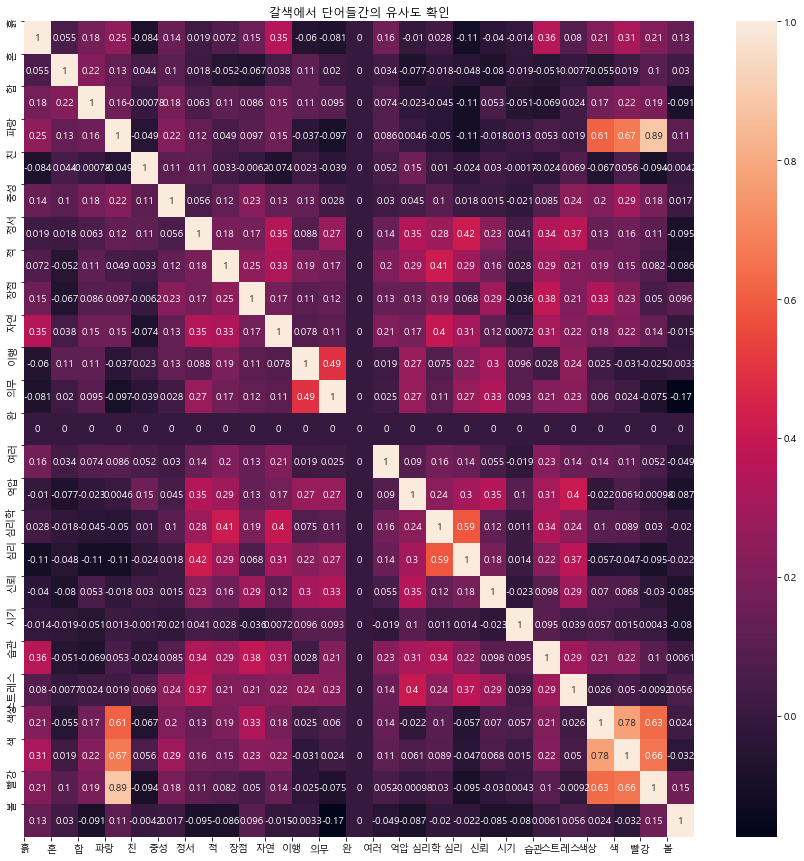

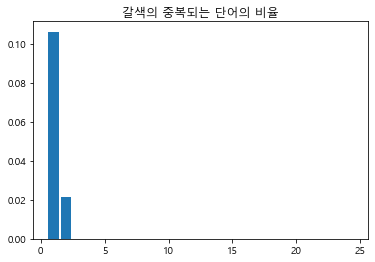

In [131]:
color_df['efficacy Morps'] = color_df['efficacy'].map(lambda x : getMorps(x))
color_df['efficacy N'] = color_df['efficacy Morps'].map(lambda x : getN(x))
color_df['efficacy NV'] = color_df['efficacy Morps'].map(lambda x : getNV(x))
color_df['efficacy count'] = color_df['efficacy N'].map(lambda x : counter(x,25)) 
for idx in color_df.index:
    
    color_name = color_df['color'][idx]
    words = color_df['efficacy count'][idx]
    over_words = color_df['efficacy NV'][idx]
    get_heatmap(words,color_name,(15,15))
    overlap_veiw(color_name,over_words,25)
    